A regression modelling process to predict various house prices

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

from sklearn import metrics

### Importing House prices datase

In [2]:
imported_house_price = ds.fetch_california_housing
housing = ds.fetch_california_housing()

In [3]:
price_df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [4]:
price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding prices to the df

In [5]:
price_df['price'] = housing.target

In [6]:
price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data preanalysis

In [7]:
# Checking for missing values
price_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [8]:
# Basic data spread
price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:>

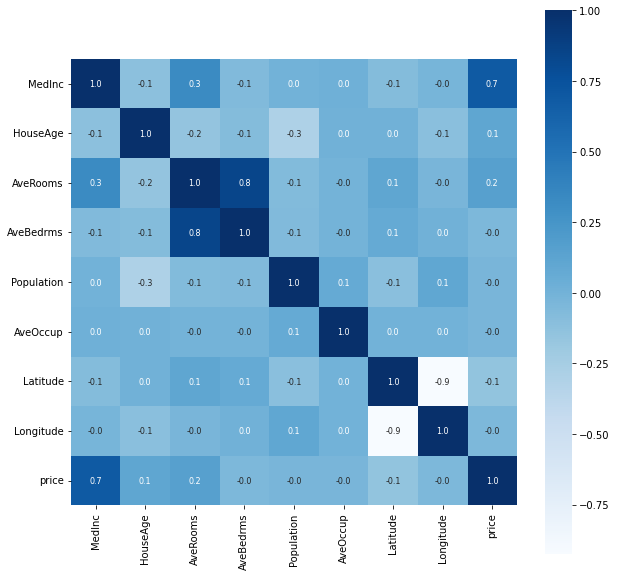

In [9]:
# Correlations between features
corrs = price_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrs, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Data processing

In [10]:
X = price_df.drop(['price'], axis=1)
Y = price_df['price']

In [11]:
print(X.shape, Y.shape)

(20640, 8) (20640,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

### Data modelling

In [ ]:

          ,
          
          ,

In [14]:
def train_and_evaluate(models, X_train, Y_train, X_test, Y_test):
  results = {model_name:{} for model_name in models}
  for model_name, model in models.items():
    model.fit(X_train, Y_train)
    train_predict, test_predict = model.predict(X_train), model.predict(X_test)
    # R-squared errors
    results[model_name]['R2 error Train'], results[model_name]['R2 error Test'] = metrics.r2_score(Y_train, train_predict), metrics.r2_score(Y_test, test_predict)
    # Mean Absolute errors
    results[model_name]['MAE Train'], results[model_name]['MAE Test'] = metrics.mean_absolute_error(Y_train, train_predict), metrics.mean_absolute_error(Y_test, test_predict)    
  return results

In [23]:
models = {'XGB': XGBRegressor(),
          'ENet': ElasticNet(),
          'SVMR': SVR(),
          'Linear': LinearRegression(),
          'B-Ridge': BayesianRidge(),
          'SGD': SGDRegressor()
          }

In [24]:
models_performance = train_and_evaluate(models, X_train, Y_train, X_test, Y_test)
for res in models_performance:
  ret = res + "\t\t"
  for key in models_performance[res]:
    ret += " \t " + key +": "+ str(models_performance[res][key])
  print(ret)

XGB		 	 R2 error Train: 0.9366047424216931 	 R2 error Test: 0.8412720430359478 	 MAE Train: 0.20475635843104117 	 MAE Test: 0.307208581216899
ENet		 	 R2 error Train: 0.41986270984980445 	 R2 error Test: 0.4398814121362945 	 MAE Train: 0.680433938098144 	 MAE Test: 0.6753527143337457
SVMR		 	 R2 error Train: -0.021734188325805537 	 R2 error Test: -0.019971920414804334 	 MAE Train: 0.8670146246665216 	 MAE Test: 0.8762717559289049
Linear		 	 R2 error Train: 0.6035699182730296 	 R2 error Test: 0.6294494603115046 	 MAE Train: 0.5321919105239314 	 MAE Test: 0.5220635081478585
B-Ridge		 	 R2 error Train: 0.6035693294157805 	 R2 error Test: 0.6294182832535324 	 MAE Train: 0.5322282980447643 	 MAE Test: 0.5221171249392579
SGD		 	 R2 error Train: -6.94470891985208e+28 	 R2 error Test: -6.710714301031093e+28 	 MAE Train: 264806217691914.97 	 MAE Test: 266274499665843.9
